Tensorflow Version =  1.14.0
Model Parameters - 
 Neurons in HL =  128 
Epochs = 1
Dataset check...


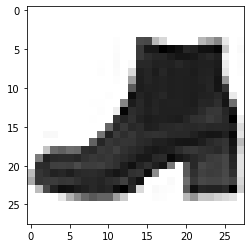

Dataset check after normalization...


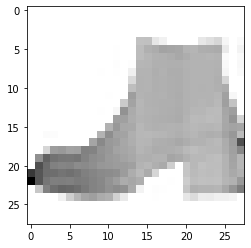


-----Effect of change in epochs-----

epoch: 1
Model_1: 2 Hidden Layers, Activation= Relu
Running Training...
60000/60000 [==============================] - 4s 70us/sample - loss: 0.4835 - acc: 0.8228
{'loss': [0.48351465262969334], 'acc': [0.82276666]}
train_error= 0.17723333835601807
Running Test...
10000/10000 [==============================] - 0s 43us/sample - loss: 0.4261 - acc: 0.8411
loss =  0.42612296812534334
Acc =  0.8411
Err =  0.15890002250671387


Model_2: 2 Hidden Layers, Activation= sigmoid
Running Training...
60000/60000 [==============================] - 4s 67us/sample - loss: 0.6727 - acc: 0.7608
{'loss': [0.672711896109581], 'acc': [0.7608]}
train_error= 0.23919999599456787
Running Test...
10000/10000 [==============================] - 0s 41us/sample - loss: 0.4707 - acc: 0.8314
loss =  0.4707075979709625
Acc =  0.8314
Err =  0.16860002279281616


Model_3: 2 Hidden Layers, Activation= tanh
Running Training...
60000/60000 [==============================] - 4s 69us/sa

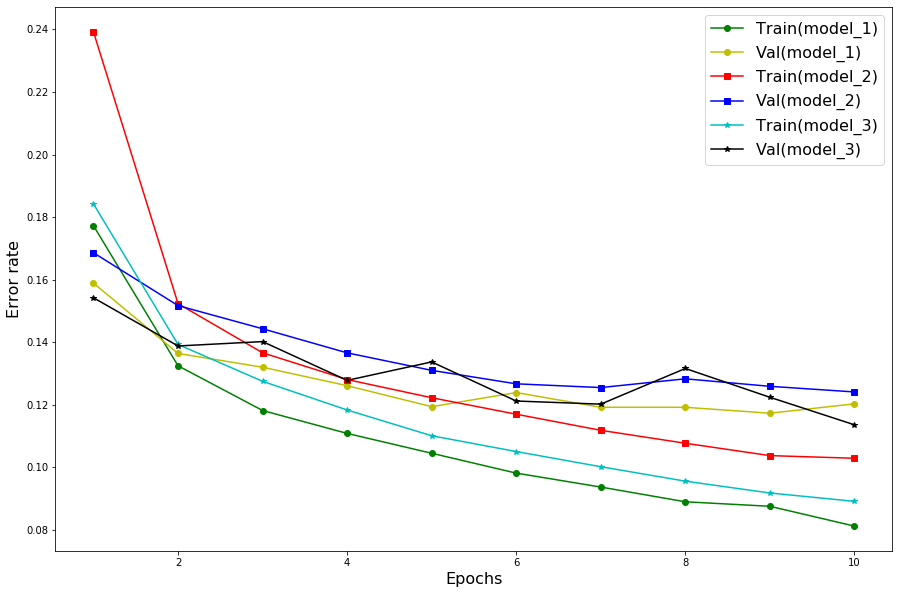

In [2]:
# EE258 Neural Networks 
# Project 1 - Classification of Fashion MNIST Dataset
# Author - Siddhesh Gaiki and Hemanta Ingle
# Instructor - Birsen Sirkeci
# San Jose State University, CA

# This project is done using some modules from Tensorflow and Keras. All due credits given to -
# Keras - https://keras.io
# Tensorflow - https://www.tensorflow.org
# Zilando - https://github.com/zalandoresearch/fashion-mnist

##################################################################################################
# Importing required libraries-
import tensorflow.keras as keras
import tensorflow as tf
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

print("Tensorflow Version = ", tf.__version__) # Prints Tensorflow Version being used.

mnist = tf.keras.datasets.fashion_mnist # Import the Fashion MNIST dataset.
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Model Parameters - 
hl_neurons=128
n_epochs=1
print ("Model Parameters - \n Neurons in HL = ",hl_neurons,"\nEpochs =", n_epochs)
#print(x_train[122]) # Check the dataset. Opening a random entry.

import matplotlib.pyplot as plt
print ("Dataset check...")
plt.imshow(x_train[122],cmap=plt.cm.binary)
plt.show()

# This dataset has inputs having vaues from 0 to 255. These need to be normalized.
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#print(x_train[122]) # Check the same sample after normalization.
print ("Dataset check after normalization...")
plt.imshow(x_train[122],cmap=plt.cm.binary)
plt.show()
loss_arr = []
acc_arr = []
Train_size_list = []
Train_error_list1 = []
Val_error_list1 = []
Train_error_list2 = []
Val_error_list2 = []

Train_error_list3 = []
Val_error_list3 = []

Train_time_list = []
Val_time_list = []
epoch_list = []

#for j in [ 0.999, 0.995, 0.99,0.985,0.98, 0.975,0.97, 0.96,0.95, 0.94, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.2, 0.1, 0.001]:
print ("\n-----Effect of change in epochs-----\n")
for n_epochs1 in [ 1,2,3,4,5,6,7,8,9,10]:
    
    print('epoch:', n_epochs1)
    epoch_list.append(n_epochs1)

    print ("Model_1: 2 Hidden Layers, Activation= Relu")
    model1 = tf.keras.models.Sequential()
    model1.add(tf.keras.layers.Flatten())
    model1.add(tf.keras.layers.Dense(hl_neurons, activation=tf.nn.relu))
    model1.add(tf.keras.layers.Dense(hl_neurons, activation=tf.nn.relu))
    model1.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
    model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    print ("Running Training...")
    
    history_callback = model1.fit(x_train, y_train, epochs=n_epochs1)
    train_acc = history_callback.history["acc"]
    print (history_callback.history)
    train_error= 1-train_acc[n_epochs1-1]
    print ("train_error=",train_error)
    Train_error_list1.append(train_error)
    print ("Running Test...")
    val_loss, val_acc = model1.evaluate(x_test, y_test)
    Val_error_list1.append(1-val_acc)
    print("loss = ",val_loss)
    print("Acc = ",val_acc)
    print("Err = ",1-val_acc)
    print ("\n")

    print ("Model_2: 2 Hidden Layers, Activation= sigmoid")
    model2 = tf.keras.models.Sequential()
    model2.add(tf.keras.layers.Flatten())
    model2.add(tf.keras.layers.Dense(hl_neurons, activation=tf.nn.sigmoid))
    model2.add(tf.keras.layers.Dense(hl_neurons, activation=tf.nn.sigmoid))
    model2.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
    model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    print ("Running Training...")
    
    history_callback = model2.fit(x_train, y_train, epochs=n_epochs1)
    train_acc = history_callback.history["acc"]
    print (history_callback.history)
    train_error= 1-train_acc[n_epochs1-1]
    print ("train_error=",train_error)
    Train_error_list2.append(train_error)
    print ("Running Test...")
    val_loss, val_acc = model2.evaluate(x_test, y_test)
    Val_error_list2.append(1-val_acc)
    print("loss = ",val_loss)
    print("Acc = ",val_acc)
    print("Err = ",1-val_acc)
    print ("\n")

    print ("Model_3: 2 Hidden Layers, Activation= tanh")
    model3 = tf.keras.models.Sequential()
    model3.add(tf.keras.layers.Flatten())
    model3.add(tf.keras.layers.Dense(hl_neurons, activation=tf.nn.tanh))
    model3.add(tf.keras.layers.Dense(hl_neurons, activation=tf.nn.tanh))
    model3.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
    model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    print ("Running Training...")
    
    history_callback = model3.fit(x_train, y_train, epochs=n_epochs1)
    train_acc = history_callback.history["acc"]
    print (history_callback.history)
    train_error= 1-train_acc[n_epochs1-1]
    print ("train_error=",train_error)
    Train_error_list3.append(train_error)
    print ("Running Test...")
    val_loss, val_acc = model3.evaluate(x_test, y_test)
    Val_error_list3.append(1-val_acc)
    print("loss = ",val_loss)
    print("Acc = ",val_acc)
    print("Err = ",1-val_acc)
    print ("\n")

plt.figure(figsize = (15,10))
plt.plot(epoch_list, Train_error_list1, 'go-', label = "Train(model_1)")
plt.plot(epoch_list, Val_error_list1, 'yo-', label = "Val(model_1)")
plt.plot(epoch_list, Train_error_list2, 'rs-', label = "Train(model_2)")
plt.plot(epoch_list, Val_error_list2, 'bs-', label = "Val(model_2)")
plt.plot(epoch_list, Train_error_list3, 'c*-', label = "Train(model_3)")
plt.plot(epoch_list, Val_error_list3, 'k*-', label = "Val(model_3)")
 

plt.xlabel('Epochs',fontsize=16)
plt.ylabel('Error rate',fontsize=16)
plt.legend(loc="upper right", fontsize=16)

Tensorflow Version =  1.14.0
Model Parameters - 
 Neurons in HL =  128 
Epochs = 1
Dataset check...


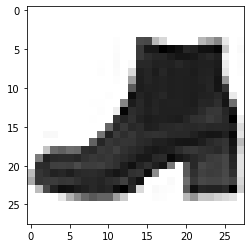

Dataset check after normalization...


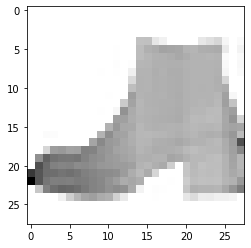


-----Effect of change in number of hidden layer neurons-----

neurons: 32
Model_1: 2 Hidden Layers, Activation= Relu
Running Training...
60000/60000 [==============================] - 5s 88us/sample - loss: 0.5603 - acc: 0.7994
{'loss': [0.5603175612688065], 'acc': [0.79935]}
train_error= 0.20064997673034668
Running Test...
10000/10000 [==============================] - 1s 75us/sample - loss: 0.4622 - acc: 0.8247
loss =  0.46216528091430664
Acc =  0.8247
Err =  0.1753000020980835


Model_2: 2 Hidden Layers, Activation= sigmoid
Running Training...
60000/60000 [==============================] - 6s 106us/sample - loss: 0.9685 - acc: 0.6660
{'loss': [0.9685246691385905], 'acc': [0.66595]}
train_error= 0.3340499997138977
Running Test...
10000/10000 [==============================] - 1s 82us/sample - loss: 0.6042 - acc: 0.7824
loss =  0.6042026772975921
Acc =  0.7824
Err =  0.2175999879837036


Model_3: 2 Hidden Layers, Activation= tanh
Running Training...
60000/60000 [=====================

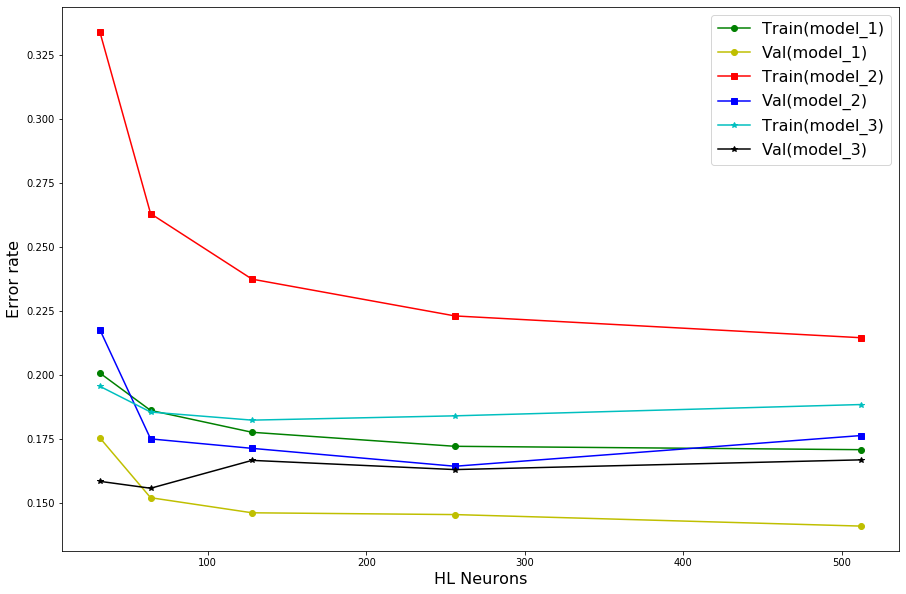

In [3]:
##################################################################################################
# Importing required libraries-
import tensorflow.keras as keras
import tensorflow as tf
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

print("Tensorflow Version = ", tf.__version__) # Prints Tensorflow Version being used.

mnist = tf.keras.datasets.fashion_mnist # Import the Fashion MNIST dataset.
(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Model Parameters - 
hl_neurons=128
n_epochs=1
print ("Model Parameters - \n Neurons in HL = ",hl_neurons,"\nEpochs =", n_epochs)
#print(x_train[122]) # Check the dataset. Opening a random entry.

import matplotlib.pyplot as plt
print ("Dataset check...")
plt.imshow(x_train[122],cmap=plt.cm.binary)
plt.show()

# This dataset has inputs having vaues from 0 to 255. These need to be normalized.
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

#print(x_train[122]) # Check the same sample after normalization.
print ("Dataset check after normalization...")
plt.imshow(x_train[122],cmap=plt.cm.binary)
plt.show()
loss_arr = []
acc_arr = []
Train_size_list = []
Train_error_list1 = []
Val_error_list1 = []
Train_error_list2 = []
Val_error_list2 = []
Train_error_list3 = []
Val_error_list3 = []

Train_time_list = []
Val_time_list = []
neuron_list = []

print ("\n-----Effect of change in number of hidden layer neurons-----\n")
for hl_neurons1 in [ 32,64,128,256,512 ]:
    
    print('neurons:', hl_neurons1)
    neuron_list.append(hl_neurons1)

    print ("Model_1: 2 Hidden Layers, Activation= Relu")
    model1 = tf.keras.models.Sequential()
    model1.add(tf.keras.layers.Flatten())
    model1.add(tf.keras.layers.Dense(hl_neurons1, activation=tf.nn.relu))
    model1.add(tf.keras.layers.Dense(hl_neurons1, activation=tf.nn.relu))
    model1.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
    model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    print ("Running Training...")
    
    history_callback = model1.fit(x_train, y_train, epochs=n_epochs)
    train_acc = history_callback.history["acc"]
    print (history_callback.history)
    train_error= 1-train_acc[n_epochs-1]
    print ("train_error=",train_error)
    Train_error_list1.append(train_error)
    print ("Running Test...")
    val_loss, val_acc = model1.evaluate(x_test, y_test)
    Val_error_list1.append(1-val_acc)
    print("loss = ",val_loss)
    print("Acc = ",val_acc)
    print("Err = ",1-val_acc)
    print ("\n")
    
    print ("Model_2: 2 Hidden Layers, Activation= sigmoid")
    model2 = tf.keras.models.Sequential()
    model2.add(tf.keras.layers.Flatten())
    model2.add(tf.keras.layers.Dense(hl_neurons1, activation=tf.nn.sigmoid))
    model2.add(tf.keras.layers.Dense(hl_neurons1, activation=tf.nn.sigmoid))
    model2.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
    model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    print ("Running Training...")
    
    history_callback = model2.fit(x_train, y_train, epochs=n_epochs)
    train_acc = history_callback.history["acc"]
    print (history_callback.history)
    train_error= 1-train_acc[n_epochs-1]
    print ("train_error=",train_error)
    Train_error_list2.append(train_error)
    print ("Running Test...")
    val_loss, val_acc = model2.evaluate(x_test, y_test)
    Val_error_list2.append(1-val_acc)
    print("loss = ",val_loss)
    print("Acc = ",val_acc)
    print("Err = ",1-val_acc)
    print ("\n")
    
    print ("Model_3: 2 Hidden Layers, Activation= tanh")
    model3 = tf.keras.models.Sequential()
    model3.add(tf.keras.layers.Flatten())
    model3.add(tf.keras.layers.Dense(hl_neurons1, activation=tf.nn.tanh))
    model3.add(tf.keras.layers.Dense(hl_neurons1, activation=tf.nn.tanh))
    model3.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
    model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    print ("Running Training...")
    
    history_callback = model3.fit(x_train, y_train, epochs=n_epochs)
    train_acc = history_callback.history["acc"]
    print (history_callback.history)
    train_error= 1-train_acc[n_epochs-1]
    print ("train_error=",train_error)
    Train_error_list3.append(train_error)
    print ("Running Test...")
    val_loss, val_acc = model3.evaluate(x_test, y_test)
    Val_error_list3.append(1-val_acc)
    print("loss = ",val_loss)
    print("Acc = ",val_acc)
    print("Err = ",1-val_acc)
    print ("\n")
    
    
plt.figure(figsize = (15,10))
plt.plot(neuron_list, Train_error_list1, 'go-', label = "Train(model_1)")
plt.plot(neuron_list, Val_error_list1, 'yo-', label = "Val(model_1)")
plt.plot(neuron_list, Train_error_list2, 'rs-', label = "Train(model_2)")
plt.plot(neuron_list, Val_error_list2, 'bs-', label = "Val(model_2)")
plt.plot(neuron_list, Train_error_list3, 'c*-', label = "Train(model_3)")
plt.plot(neuron_list, Val_error_list3, 'k*-', label = "Val(model_3)")
 

plt.xlabel('HL Neurons',fontsize=16)
plt.ylabel('Error rate',fontsize=16)
plt.legend(loc="upper right", fontsize=16)